In [ ]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q "/content/drive/My Drive/424 group project/dataset.zip" -d "/content/dataset"

In [ ]:
!pip install pytorch-minimize
!pip install torchmetrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch as pt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchmin import minimize


import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from torch.nn.utils import clip_grad_norm_

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

## Data Processing


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import torchvision
import torch
batch_size = 16

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])


train_directory = '/content/dataset/train'
train_dataset = torchvision.datasets.ImageFolder(train_directory, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


def calculate_mean_std(loader):
    mean = 0.
    std = 0.
    total_images_count = 0

    for images, _ in loader:
        image_count_in_batch = images.size(0)
        images = images.view(image_count_in_batch, images.size(1), -1)
        mean += images.mean(2).sum(0)
        std += images.std(2).sum(0)
        total_images_count += image_count_in_batch

    mean /= total_images_count
    std /= total_images_count

    return mean, std

mean, std = calculate_mean_std(train_loader)

print(f'Mean: {mean}')
print(f'Std: {std}')


Mean: tensor([0.6501, 0.5934, 0.5399])
Std: tensor([0.2030, 0.2106, 0.2233])


In [ ]:
from torch.utils.data import DataLoader, random_split
import torchvision

torch.manual_seed(42)

batch_size = 256
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.6501, 0.5934, 0.5399], std=[0.2030, 0.2106, 0.2233])
])

train_directory = '/content/dataset/train'
test_directory = '/content/dataset/test'


train_dataset = torchvision.datasets.ImageFolder(train_directory, transform=transform)
val_dataset = torchvision.datasets.ImageFolder(test_directory, transform=transform)

train_size = int(0.9 * len(train_dataset))
test_size = len(train_dataset) - train_size
train_dataset, test_dataset = random_split(train_dataset, [train_size, test_size])


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

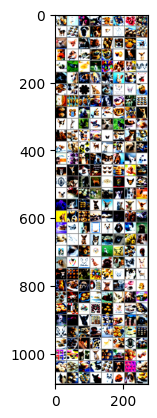

muffin chihuahua muffin chihuahua muffin muffin muffin muffin chihuahua muffin chihuahua chihuahua chihuahua chihuahua muffin muffin chihuahua chihuahua chihuahua muffin muffin chihuahua muffin chihuahua chihuahua chihuahua muffin muffin muffin muffin chihuahua chihuahua muffin chihuahua muffin chihuahua chihuahua muffin chihuahua chihuahua chihuahua chihuahua muffin muffin chihuahua chihuahua muffin chihuahua muffin muffin chihuahua chihuahua muffin chihuahua chihuahua muffin chihuahua muffin muffin muffin chihuahua muffin chihuahua muffin muffin muffin chihuahua muffin muffin muffin muffin chihuahua chihuahua chihuahua chihuahua chihuahua chihuahua chihuahua muffin muffin chihuahua muffin muffin muffin chihuahua muffin chihuahua muffin muffin chihuahua chihuahua chihuahua chihuahua muffin chihuahua muffin muffin muffin chihuahua muffin chihuahua chihuahua chihuahua chihuahua chihuahua chihuahua muffin chihuahua chihuahua muffin chihuahua muffin chihuahua chihuahua chihuahua chihuahua

In [ ]:
# dataloader check

import matplotlib.pyplot as plt
import torchvision
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

classes = ('chihuahua', 'muffin')

print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## Model Architecture


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ChihuahuaMuffinCNN(nn.Module):
    def __init__(self):
        super(ChihuahuaMuffinCNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 4 * 4, 128)  # The image size is reduced to 4x4 after all the pooling
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        x = x.view(-1, 64 * 4 * 4)  # Flatten the output for the dense layer
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ChihuahuaMuffinCNN().to(device)

print(model)


ChihuahuaMuffinCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ChihuahuaMuffinCNN(nn.Module):
    def __init__(self):
        super(ChihuahuaMuffinCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 4, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(4, 8, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)

        self.fc1 = nn.Linear(16 * 4 * 4, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ChihuahuaMuffinCNN().to(device)

print(model)


ChihuahuaMuffinCNN(
  (conv1): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=256, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
)


In [ ]:

import torch
import gc

gc.collect()
torch.cuda.empty_cache()

## Model Assessment

In [ ]:
def evaluate_accuracy(model, data_loader, device):
    """
    Evaluate the accuracy of the model on a given dataset.

    Parameters:
    - model: The neural network model.
    - data_loader: DataLoader for the dataset to evaluate.
    - device: The device to run the model on ('cuda' or 'cpu').

    Returns:
    - accuracy: The accuracy of the model on the dataset.
    """
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy


In [ ]:
# Training with BFGS
import torch
import torchmin
from torchmin import Minimizer
import torch.nn as nn
from tqdm.notebook import tqdm

criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = optimizer = Minimizer(model.parameters(),
                          method='bfgs',
                          tol=1e-3,
                          max_iter=100,
                          disp=0)

num_epochs = 10

def train():
    model.train()

    for epoch in range(num_epochs):
        total_loss = 0
        progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), leave=False)
        progress_bar.set_description(f'Epoch {epoch+1}/{num_epochs}')

        for i, (inputs, labels) in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)

            def closure():
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                if loss.requires_grad:
                    loss.backward(retain_graph=True)
                return loss

            optimizer.step(closure)

            with torch.no_grad():
                loss = closure()
                total_loss += loss.item()

            progress_bar.set_postfix({'Loss': total_loss / (i + 1)})

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}")

        average_loss = total_loss / len(train_loader)
        val_accuracy = evaluate_accuracy(model, val_loader, device)
        path = f'/content/drive/MyDrive/424 group project/ModelWeights/bfgs_{epoch}.pth'
        torch.save(model.state_dict(), path)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {average_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')


train()


  0%|          | 0/17 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 89.55 GiB. GPU 0 has a total capacity of 15.77 GiB of which 15.31 GiB is free. Process 45578 has 468.00 MiB memory in use. Of the allocated memory 22.21 MiB is allocated by PyTorch, and 43.79 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
path = '/content/drive/MyDrive/424 group project/ModelWeights/BFGS_final.pth'
torch.save(model.state_dict(), path)

In [ ]:
model = ChihuahuaMuffinCNN().to(device)

model.load_state_dict(torch.load('/content/drive/MyDrive/424 group project/ModelWeights/bfgs_9.pth'))

In [ ]:
test_accuracy = evaluate_accuracy(model, test_loader, device)
print(f'Test Accuracy: {test_accuracy:.4f}')

In [ ]:
!pip install torch_optimizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.1 MB/s eta 0:00:00


In [ ]:
model = ChihuahuaMuffinCNN()

In [ ]:
#training with adahessian
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import torch_optimizer as optim
import torch
import torch.nn as nn
from tqdm.notebook import tqdm

optimizer = optim.Adahessian(
    model.parameters(),
    lr= 0.001,
    betas= (0.9, 0.999),
    eps= 1e-4,
    weight_decay=0.0,
    hessian_power=0.95,
)

num_epochs = 20

def train():
    model.train()

    for epoch in range(num_epochs):
        total_loss = 0
        progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), leave=False)
        progress_bar.set_description(f'Epoch {epoch+1}/{num_epochs}')

        for i, (inputs, labels) in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)

            def closure():
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                if loss.requires_grad:
                    loss.backward(create_graph=True)
                return loss

            optimizer.step(closure)

            with torch.no_grad():
                loss = closure()
                total_loss += loss.item()

            progress_bar.set_postfix({'Loss': total_loss / (i + 1)})

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}")

        average_loss = total_loss / len(train_loader)
        val_accuracy = evaluate_accuracy(model, val_loader, device)
        path = f'/content/drive/MyDrive/424 group project/ModelWeights/ada_hessian_v2_{epoch}.pth'
        torch.save(model.state_dict(), path)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {average_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')


train()


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [1/20], Loss: 0.6862
Epoch 1/20, Loss: 0.6862, Validation Accuracy: 0.5633


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [2/20], Loss: 0.6802
Epoch 2/20, Loss: 0.6802, Validation Accuracy: 0.6005


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [3/20], Loss: 0.6736
Epoch 3/20, Loss: 0.6736, Validation Accuracy: 0.6647


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [4/20], Loss: 0.6663
Epoch 4/20, Loss: 0.6663, Validation Accuracy: 0.6909


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [5/20], Loss: 0.6574
Epoch 5/20, Loss: 0.6574, Validation Accuracy: 0.7179


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [6/20], Loss: 0.6460
Epoch 6/20, Loss: 0.6460, Validation Accuracy: 0.7255


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [7/20], Loss: 0.6317
Epoch 7/20, Loss: 0.6317, Validation Accuracy: 0.7306


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [8/20], Loss: 0.6152
Epoch 8/20, Loss: 0.6152, Validation Accuracy: 0.7289


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [9/20], Loss: 0.5977
Epoch 9/20, Loss: 0.5977, Validation Accuracy: 0.7441


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [10/20], Loss: 0.5806
Epoch 10/20, Loss: 0.5806, Validation Accuracy: 0.7399


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [11/20], Loss: 0.5657
Epoch 11/20, Loss: 0.5657, Validation Accuracy: 0.7576


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [12/20], Loss: 0.5533
Epoch 12/20, Loss: 0.5533, Validation Accuracy: 0.7568


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [13/20], Loss: 0.5432
Epoch 13/20, Loss: 0.5432, Validation Accuracy: 0.7635


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [14/20], Loss: 0.5350
Epoch 14/20, Loss: 0.5350, Validation Accuracy: 0.7618


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [15/20], Loss: 0.5289
Epoch 15/20, Loss: 0.5289, Validation Accuracy: 0.7635


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [16/20], Loss: 0.5236
Epoch 16/20, Loss: 0.5236, Validation Accuracy: 0.7703


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [17/20], Loss: 0.5184
Epoch 17/20, Loss: 0.5184, Validation Accuracy: 0.7677


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [18/20], Loss: 0.5149
Epoch 18/20, Loss: 0.5149, Validation Accuracy: 0.7753


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [19/20], Loss: 0.5099
Epoch 19/20, Loss: 0.5099, Validation Accuracy: 0.7762


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [20/20], Loss: 0.5065
Epoch 20/20, Loss: 0.5065, Validation Accuracy: 0.7753


In [ ]:
#training with adahessian
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import torch_optimizer as optim
import torch
import torch.nn as nn
from tqdm.notebook import tqdm
import time

optimizer = optim.Adahessian(
    model.parameters(),
    lr= 0.001,
    betas= (0.9, 0.999),
    eps= 1e-4,
    weight_decay=0.0,
    hessian_power=0.95,
)

num_epochs = 20  # Number of epochs to train for

def train():
    start_time = time.time()
    model.train()  # Set the model to training mode

    for epoch in range(num_epochs):
        epoch_start_time = time.time()
        total_loss = 0
        progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), leave=False)
        progress_bar.set_description(f'Epoch {epoch+1}/{num_epochs}')

        for i, (inputs, labels) in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)

            def closure():
                optimizer.zero_grad()  # Clears the gradients of all optimized tensors
                outputs = model(inputs)  # Forward pass
                loss = criterion(outputs, labels)  # Compute the loss
                if loss.requires_grad:  # Ensure the loss requires gradient
                    loss.backward(create_graph=True)  # Backward pass
                return loss

            optimizer.step(closure)  # Performs a single optimization step

            with torch.no_grad():
                loss = closure()  # Re-evaluate the closure to get the current loss
                total_loss += loss.item()

            progress_bar.set_postfix({'Loss': total_loss / (i + 1)})

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}")

        average_loss = total_loss / len(train_loader)
        # Evaluate model accuracy on the validation set after each epoch
        val_accuracy = evaluate_accuracy(model, val_loader, device)
        #path = f'/content/drive/MyDrive/424 group project/ModelWeights/ada_hessian_v2_{epoch}.pth'
        #torch.save(model.state_dict(), path)
        epoch_end_time = time.time()
        epoch_time = epoch_end_time - epoch_start_time
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {average_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}, Epoch Time: {epoch_time:.2f} seconds')
        #print(f'Epoch {epoch+1}/{num_epochs}, Loss: {average_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')


train()

  0%|          | 0/17 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/autograd/__init__.py:266: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at ../torch/csrc/autograd/engine.cpp:1177.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch [1/20], Loss: 0.6853
Epoch 1/20, Loss: 0.6853, Validation Accuracy: 0.5405, Epoch Time: 43.92 seconds


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [2/20], Loss: 0.6806
Epoch 2/20, Loss: 0.6806, Validation Accuracy: 0.5405, Epoch Time: 41.98 seconds


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [3/20], Loss: 0.6757
Epoch 3/20, Loss: 0.6757, Validation Accuracy: 0.5515, Epoch Time: 42.02 seconds


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [4/20], Loss: 0.6712
Epoch 4/20, Loss: 0.6712, Validation Accuracy: 0.5752, Epoch Time: 41.98 seconds


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [5/20], Loss: 0.6660
Epoch 5/20, Loss: 0.6660, Validation Accuracy: 0.6275, Epoch Time: 44.28 seconds


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [6/20], Loss: 0.6608
Epoch 6/20, Loss: 0.6608, Validation Accuracy: 0.6343, Epoch Time: 45.81 seconds


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [7/20], Loss: 0.6536
Epoch 7/20, Loss: 0.6536, Validation Accuracy: 0.6630, Epoch Time: 46.28 seconds


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [8/20], Loss: 0.6461
Epoch 8/20, Loss: 0.6461, Validation Accuracy: 0.6647, Epoch Time: 46.04 seconds


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [9/20], Loss: 0.6384
Epoch 9/20, Loss: 0.6384, Validation Accuracy: 0.6791, Epoch Time: 44.31 seconds


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [10/20], Loss: 0.6306
Epoch 10/20, Loss: 0.6306, Validation Accuracy: 0.6934, Epoch Time: 43.85 seconds


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [11/20], Loss: 0.6220
Epoch 11/20, Loss: 0.6220, Validation Accuracy: 0.7078, Epoch Time: 43.61 seconds


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [12/20], Loss: 0.6118
Epoch 12/20, Loss: 0.6118, Validation Accuracy: 0.7280, Epoch Time: 44.07 seconds


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [13/20], Loss: 0.6023
Epoch 13/20, Loss: 0.6023, Validation Accuracy: 0.7340, Epoch Time: 44.07 seconds


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [14/20], Loss: 0.5914
Epoch 14/20, Loss: 0.5914, Validation Accuracy: 0.7458, Epoch Time: 44.12 seconds


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [15/20], Loss: 0.5807
Epoch 15/20, Loss: 0.5807, Validation Accuracy: 0.7475, Epoch Time: 42.52 seconds


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [16/20], Loss: 0.5700
Epoch 16/20, Loss: 0.5700, Validation Accuracy: 0.7500, Epoch Time: 42.60 seconds


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [17/20], Loss: 0.5603
Epoch 17/20, Loss: 0.5603, Validation Accuracy: 0.7551, Epoch Time: 42.42 seconds


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [18/20], Loss: 0.5517
Epoch 18/20, Loss: 0.5517, Validation Accuracy: 0.7601, Epoch Time: 42.45 seconds


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [19/20], Loss: 0.5442
Epoch 19/20, Loss: 0.5442, Validation Accuracy: 0.7584, Epoch Time: 42.29 seconds


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [20/20], Loss: 0.5389
Epoch 20/20, Loss: 0.5389, Validation Accuracy: 0.7593, Epoch Time: 42.18 seconds


In [ ]:
test_accuracy = evaluate_accuracy(model, test_loader, device)
print(f'Test Accuracy: {test_accuracy:.4f}')
# with 0.01 learning rate and 1.0 hessian power and 10 epochs

Test Accuracy: 0.8207


In [ ]:
test_accuracy = evaluate_accuracy(model, test_loader, device)
print(f'Test Accuracy: {test_accuracy:.4f}')
# with 0.001 learning rate and 0.95 hessian power and 20 epochs

Test Accuracy: 0.7869


In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/424 group project/ada_hessian10.pth'))